In [2]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import json
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow.keras as keras
import matplotlib.pyplot as plt

In [3]:
DATA_PATH = "data.json"

def load_data(data_path):
    """Loads training dataset from json file.

        :param data_path (str): Path to json file containing data
        :return X (ndarray): Inputs
        :return y (ndarray): Targets
    """

    with open(data_path, "r") as fp:
        data = json.load(fp)

    # convert lists to numpy arrays
    X = np.array(data["mfcc"])
    y = np.array(data["labels"])

    print("Data succesfully loaded!")

    return X, y


In [4]:
def plot_history(history):
    """Plots accuracy/loss for training/validation set as a function of the epochs

        :param history: Training history of model
        :return:
    """

    fig, axs = plt.subplots(2)

    # create accuracy sublpot
    axs[0].plot(history.history["acc"], label="train accuracy")
    axs[0].plot(history.history["val_acc"], label="test accuracy")
    axs[0].set_ylabel("Accuracy")
    axs[0].legend(loc="lower right")
    axs[0].set_title("Accuracy eval")

    # create error sublpot
    axs[1].plot(history.history["loss"], label="train error")
    axs[1].plot(history.history["val_loss"], label="test error")
    axs[1].set_ylabel("Error")
    axs[1].set_xlabel("Epoch")
    axs[1].legend(loc="upper right")
    axs[1].set_title("Error eval")

    plt.show()

In [6]:
if __name__ == "__main__":

    # load data
    X, y = load_data(DATA_PATH)

    # create train/test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

    # build network topology
    model = keras.Sequential([

        # input layer
        keras.layers.Flatten(input_shape=(X.shape[1], X.shape[2])),

        # 1st dense layer
        keras.layers.Dense(512, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001)),
        keras.layers.Dropout(0.3),

        # 2nd dense layer
        keras.layers.Dense(256, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001)),
        keras.layers.Dropout(0.3),

        # 3rd dense layer
        keras.layers.Dense(64, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001)),
        keras.layers.Dropout(0.3),

        # output layer
        keras.layers.Dense(10, activation='softmax')
    ])

    # compile model
    optimiser = keras.optimizers.Adam(learning_rate=0.0001)
    model.compile(optimizer=optimiser,
                  loss='sparse_categorical_crossentropy',
                  metrics=['acc'])

    model.summary()

    # train model
    history = model.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=32, epochs=100)



Data succesfully loaded!
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 1690)              0         
_________________________________________________________________
dense (Dense)                (None, 512)               865792    
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               131328    
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)      

6997/6997 [==============================] - 3s 464us/sample - loss: 2.3817 - acc: 0.3566 - val_loss: 2.2923 - val_acc: 0.4385
Epoch 47/100
6997/6997 [==============================] - 3s 461us/sample - loss: 2.3574 - acc: 0.3643 - val_loss: 2.3160 - val_acc: 0.4181
Epoch 48/100
6997/6997 [==============================] - 3s 459us/sample - loss: 2.2911 - acc: 0.3922 - val_loss: 2.2030 - val_acc: 0.4745
Epoch 49/100
6997/6997 [==============================] - 3s 461us/sample - loss: 2.2505 - acc: 0.3989 - val_loss: 2.1869 - val_acc: 0.4635
Epoch 50/100
6997/6997 [==============================] - 3s 475us/sample - loss: 2.2027 - acc: 0.4082 - val_loss: 2.1294 - val_acc: 0.4655
Epoch 51/100
6997/6997 [==============================] - 3s 474us/sample - loss: 2.1721 - acc: 0.4170 - val_loss: 2.1230 - val_acc: 0.4685
Epoch 52/100
6997/6997 [==============================] - 3s 473us/sample - loss: 2.1378 - acc: 0.4196 - val_loss: 2.0940 - val_acc: 0.4885
Epoch 53/100
6997/6997 [=========

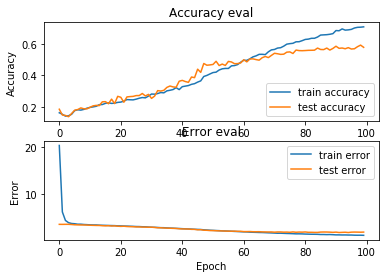

In [7]:
# plot accuracy and error as a function of the epochs
plot_history(history)

In [8]:
# evaluate model on test set
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print('\nTest accuracy:', test_acc)

2999/2999 - 0s - loss: 1.7991 - acc: 0.5769

Test accuracy: 0.57685894


In [11]:
model_json = model.to_json()
with open("modelCNN.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("modelCNN.h5")

In [15]:
# imports
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import keras
from keras.models import load_model
from keras.utils import CustomObjectScope
from keras.initializers import glorot_uniform
from keras.models import model_from_json 

# opening and store file in a variable

json_file = open('modelCNN.json','r')
loaded_model_json = json_file.read()
json_file.close()

# use Keras model_from_json to make a loaded model
with CustomObjectScope({'GlorotUniform': glorot_uniform()}):
    loaded_model = model_from_json(loaded_model_json)

# load weights into new model

loaded_model.load_weights("modelCNN.h5")
print("Loaded Model from disk")

# compile and evaluate loaded model

loaded_model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

Loaded Model from disk
